# Geometric Fractals
Geometric fractals are formed by repeating a pattern or action at smaller and smaller scales. The following are examples of some geometric fractals:
![fractal-examples](https://drive.google.com/uc?id=1TVGEVY3-PRm_dJaGEbTTLnEjpOWF0pnS)

### Koch curve
Repetition at smaller scales lends itself to a recursive implementation in code. We will look at how to do this with the **Koch curve**:
![koch-curve](https://drive.google.com/uc?id=1K2iDHuBmvWVSClFlIQK8dYnS4NzlNftc)

The Koch curve is constructed by subdividing a segment into thirds, placing an equilateral triangle in the middle third, and removing its base.
The length of the Koch curve grows by $4/3$ at each iteration. This means that in the limit of infinite iterations, the Koch curve traverses an infinite distance, though it is contained in a finite area!

Below, we will write a function which recursively draws line segments following the Koch curve to a specified number of iterations (the depth).

First, we'll define a helper function to draw a line segment given the $(x,y)$ coordinates of one endpoint, the angle $\theta$ of the segment with respect to the horizontal, and the length $r$:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# plot a line segment given one endpoint, an angle, and length:
def draw_line(x, y, theta, r, ax):
    ax.plot([x, x + r*np.cos(theta)],
            [y, y + r*np.sin(theta)],
            color='k', lw=1)

### Recursive subdivision
Next let's look at how we can recursively draw lines in the pattern of the Koch curve. Instead of our straight segment, we want to subdivide the length into four pieces following the geometry of the Koch curve.

![koch-segments](https://drive.google.com/uc?id=1oYIvvh0Zpx5d4-c2NCM_HOBWYtpaCVum)

Some trigonometry is needed - the following figure shows an example for getting the new endpoint, length, and orientation of the second segment.
![koch-segments](https://drive.google.com/uc?id=1KzDPxHeWv3D4DcaaGZh92-LGUbymRmQC)

In [38]:
# recursively draw 4 line segments in the pattern of the Koch curve.
def koch_curve(k, x, y, theta, r, ax):
    # If the recursion depth k = 1, terminate and draw a single line.
    if k == 1:
        draw_line(x, y, theta, r, ax)
        
    # otherwise, subdivide the line into 4 segments:
    else:
        # The first segment starts at current endpoint,
        # has no relative rotation, and is 1/3 the length.
        x1 = x
        y1 = y
        koch_curve(k-1, x1, y1, theta, r/3, ax)
        
        # The second segment starts r/3 along current heading,
        # then heads at a 60 degree counterclockwise rotation.
        x2 = x + r/3*np.cos(theta)
        y2 = y + r/3*np.sin(theta)
        koch_curve(k-1, x2, y2, theta + np.pi/3, r/3, ax)
        
        # The third segment starts at the final endpoint of (x2,y2) segment,
        # and has a 60 degree clockwise rotation relative to current theta.
        x3 = x2 + r/3*np.cos(theta + np.pi/3)
        y3 = y2 + r/3*np.sin(theta + np.pi/3)
        koch_curve(k-1, x3, y3, theta - np.pi/3, r/3, ax)
        
        # The fourth segment starts at 2r/3 along current heading,
        # and has no relative rotation.
        x4 = x + 2*r/3*np.cos(theta)
        y4 = y + 2*r/3*np.sin(theta)
        koch_curve(k-1, x4, y4, theta, r/3, ax)

Some things to notice about the four recursive function calls:
- We are decrementing the iteration counter k by 1 for each new call, so recursion terminates once we reach $k=1$
- Each new segment has a new starting endpoint $(x_i,y_i)$ as given by our trig rules
- Each new segment has a new orientation relative to the current angle $\theta$
- Each new segment has 1/3 the length
- We are passing in the same axis object, so all our segments are drawn on the same plot

Let's write a short wrapper function that can start off our recursive subdivision with a segment of unit length, along a specified angle:

In [51]:
def draw_fractal(fun, n, theta, ax):
    '''Draw a fractal curve to the specified number of iterations n.
       fun - the function which performs recursive subdivision
       n - the number of iterations
       theta - the orientation of the first segment
       ax - an axis object on which to plot the curve.
    '''
    if n < 1:
        raise ValueError('Iteration must be greater than zero.')
    fun(k=n, x=0, y=0, theta=theta, r=1, ax=ax)

Let's draw the 6th iteration of the Koch curve:

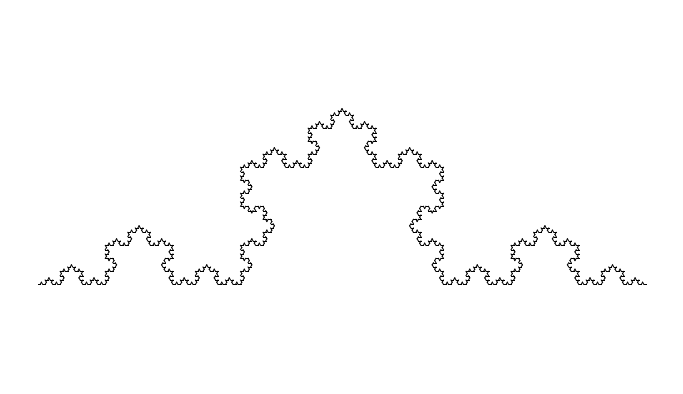

In [62]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
draw_fractal(koch_curve, n=6, theta=0., ax=ax)
ax.axis('equal')
ax.axis('off')
plt.show()

### Dragon curve
Another interesting structure we can produce geometrically is the dragon curve. At each iteration, we replace one line segment by two new segments at angles of 45 degrees relative to the current orientation. However, there is a twist: we'd like the "handedness" of the two segments to be different, as illustrated below:
![dragon-curve](https://drive.google.com/uc?id=1Z0Ik8XsBGHK6UPKYzHrt25sBvpHfx7mz)

For a more concrete illustration, this same effect can be replicated by folding a strip of paper repeatedly in half!

In [53]:
# recursively draw 2 line segments in the pattern of the dragon curve.
def dragon_curve(k, x, y, theta, r, ax):
    # If the recursion depth k = 1, terminate and draw a single line.
    if k == 1:
        draw_line(x, y, theta, r, ax)
        
    # otherwise, subdivide the line into 2 new segments:
    else:
        x1 = x
        y1 = y
        dragon_curve(k-1, x1, y1, theta + np.pi/4, r/np.sqrt(2), ax)
        x2 = x + r*np.cos(theta)
        y2 = y + r*np.sin(theta)
        dragon_curve(k-1, x2, y2, theta + 3*np.pi/4, r/np.sqrt(2), ax)

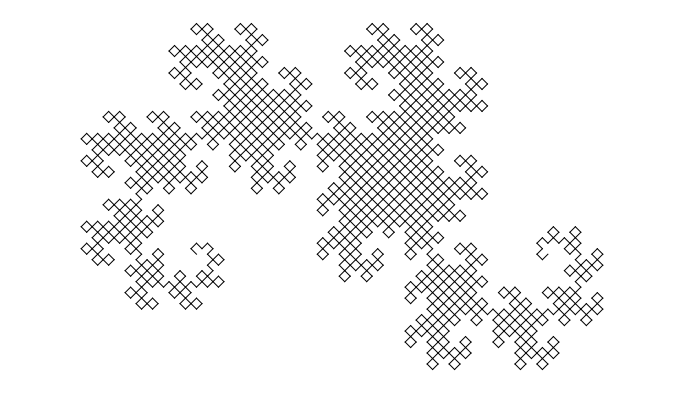

In [54]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
draw_fractal(dragon_curve, n=12, theta=0., ax=ax)
ax.axis('equal')
ax.axis('off')
plt.show()

### Try with your group:
Repurpose the idea of recursively drawing line segments we've discussed to create a fractal tree, as shown below:
![fractal_tree](https://drive.google.com/uc?id=1FnYNTZh0z9zWghxc0MfJMkFFYrEHW8E9)

At each recursive step, your function should draw a base segment that extends from $(x,y)$ to $(x+r\cos\theta,y+r\sin\theta)$, and make recursive calls for two new segments that branch from the second endpoint of the base. The two new segments should have a length $\alpha{r}$, and be oriented in the directions $\theta+\phi$ and $\theta-\phi$. To start, use the values $\alpha=0.6$, $\phi=\pi/3$.

In [55]:
def fractal_tree(k, x, y, theta, r, ax):
    # If the recursion depth k = 1, terminate and draw a single line.
    if k == 1:
        draw_line(x, y, theta, r, ax)
        
    # otherwise, draw the current branch, then create 2 new segments +/- phi away from theta,
    # and a factor alpha times the length.
    else:
        # YOUR CODE HERE #
        

Run the line below to test drawing your tree after 10 iterations:

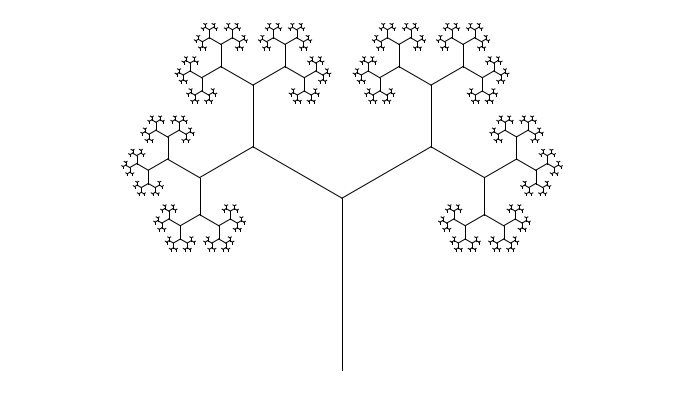

In [56]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
draw_fractal(fractal_tree, n=10, theta=np.pi/2., ax=ax)
ax.axis('equal')
ax.axis('off')
plt.show()

Once your fractal tree is working as expected, you can test different variants! What happens if the two branching segments have different angles, $\phi_1$ and $\phi_2$, chosen at random? What if the factor by which the branch length decreases, $\alpha$, is varied?